In [1]:
%cd /Users/typhaine/Documents/Doc Gorilla/WhereIsMyMNIST/notebooks

/Users/typhaine/Documents/Doc Gorilla/WhereIsMyMNIST/notebooks


In [2]:
import os
import imageio
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
import pygame
from psychopy import visual, core, event, gui, data

from what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST, MotionCloudNoise
import MotionClouds as mc

from main import init
args = init(filename='../data/2019-06-12') # pas de drop out!
args


pygame 2.0.1 (SDL 2.0.14, Python 3.7.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


{'w': 28,
 'minibatch_size': 100,
 'train_batch_size': 50000,
 'test_batch_size': 10000,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'what_offset_std': 15,
 'what_offset_max': 25,
 'N_pic': 128,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'do_mask': True,
 'N_theta': 6,
 'N_azimuth': 24,
 'N_eccentricity': 10,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.0,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': True,
 'bn1_bn_momentum': 0.5,
 'bn2_bn_momentum': 0.5,
 'momentum': 0.3,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': False,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-06-12',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'save_model': True}

In [4]:
def generate_data(i_offset,j_offset):
    transform=transforms.Compose([
                               WhatShift(args,i_offset=i_offset, j_offset=j_offset),
                               WhatBackground(contrast = args.contrast,
                                              noise=0.5, 
                                              sf_0=args.sf_0, 
                                              B_sf=args.B_sf),
                               transforms.ToTensor(),
                               transforms.Normalize((args.mean,), (args.std,))
                           ])

    dataset_train = MNIST('../data',
                        train=True,
                        download=True,
                        transform=transform,
                        )

    train_loader = DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

    data, label = next(iter(train_loader))
    return data, label

In [5]:
data_one, label_one = generate_data(i_offset=random.randint(0,50), j_offset=random.randint(0,50))
data_two, label_two = generate_data(i_offset=random.randint(-50,0), j_offset=random.randint(-50,0))
data_three, label_three = generate_data(i_offset=random.randint(-50,0), j_offset=random.randint(0,50))
data_four, label_four = generate_data(i_offset=random.randint(0,50), j_offset=random.randint(-50,0))

[[[0.37965119 0.37965119 0.37965119 1.        ]
  [0.42480963 0.42480963 0.42480963 1.        ]
  [0.52218399 0.52218399 0.52218399 1.        ]
  ...
  [0.33459613 0.33459613 0.33459613 1.        ]
  [0.35372846 0.35372846 0.35372846 1.        ]
  [0.3715474  0.3715474  0.3715474  1.        ]]

 [[0.40855726 0.40855726 0.40855726 1.        ]
  [0.48222875 0.48222875 0.48222875 1.        ]
  [0.55295443 0.55295443 0.55295443 1.        ]
  ...
  [0.3483338  0.3483338  0.3483338  1.        ]
  [0.36869666 0.36869666 0.36869666 1.        ]
  [0.37735245 0.37735245 0.37735245 1.        ]]

 [[0.4289783  0.4289783  0.4289783  1.        ]
  [0.47595169 0.47595169 0.47595169 1.        ]
  [0.51577501 0.51577501 0.51577501 1.        ]
  ...
  [0.37021665 0.37021665 0.37021665 1.        ]
  [0.38352647 0.38352647 0.38352647 1.        ]
  [0.39165882 0.39165882 0.39165882 1.        ]]

 ...

 [[0.49187045 0.49187045 0.49187045 1.        ]
  [0.52702392 0.52702392 0.52702392 1.        ]
  [0.57380

[[[0.49947531 0.49947531 0.49947531 1.        ]
  [0.44713948 0.44713948 0.44713948 1.        ]
  [0.37656664 0.37656664 0.37656664 1.        ]
  ...
  [0.49302471 0.49302471 0.49302471 1.        ]
  [0.52390503 0.52390503 0.52390503 1.        ]
  [0.52583066 0.52583066 0.52583066 1.        ]]

 [[0.50271122 0.50271122 0.50271122 1.        ]
  [0.45191539 0.45191539 0.45191539 1.        ]
  [0.40679999 0.40679999 0.40679999 1.        ]
  ...
  [0.57598409 0.57598409 0.57598409 1.        ]
  [0.55835225 0.55835225 0.55835225 1.        ]
  [0.52523202 0.52523202 0.52523202 1.        ]]

 [[0.49811148 0.49811148 0.49811148 1.        ]
  [0.46321521 0.46321521 0.46321521 1.        ]
  [0.42513691 0.42513691 0.42513691 1.        ]
  ...
  [0.61389728 0.61389728 0.61389728 1.        ]
  [0.56674274 0.56674274 0.56674274 1.        ]
  [0.52552798 0.52552798 0.52552798 1.        ]]

 ...

 [[0.4576137  0.4576137  0.4576137  1.        ]
  [0.39940403 0.39940403 0.39940403 1.        ]
  [0.33874

[[[0.44563323 0.44563323 0.44563323 1.        ]
  [0.42993069 0.42993069 0.42993069 1.        ]
  [0.45643029 0.45643029 0.45643029 1.        ]
  ...
  [0.59740843 0.59740843 0.59740843 1.        ]
  [0.59035111 0.59035111 0.59035111 1.        ]
  [0.52041509 0.52041509 0.52041509 1.        ]]

 [[0.46563015 0.46563015 0.46563015 1.        ]
  [0.47111953 0.47111953 0.47111953 1.        ]
  [0.5047853  0.5047853  0.5047853  1.        ]
  ...
  [0.55178231 0.55178231 0.55178231 1.        ]
  [0.55119795 0.55119795 0.55119795 1.        ]
  [0.50234694 0.50234694 0.50234694 1.        ]]

 [[0.4982252  0.4982252  0.4982252  1.        ]
  [0.48348344 0.48348344 0.48348344 1.        ]
  [0.48461408 0.48461408 0.48461408 1.        ]
  ...
  [0.51750939 0.51750939 0.51750939 1.        ]
  [0.53563995 0.53563995 0.53563995 1.        ]
  [0.51712095 0.51712095 0.51712095 1.        ]]

 ...

 [[0.36955659 0.36955659 0.36955659 1.        ]
  [0.32020502 0.32020502 0.32020502 1.        ]
  [0.34179

[[[0.5537307  0.5537307  0.5537307  1.        ]
  [0.53529103 0.53529103 0.53529103 1.        ]
  [0.54038634 0.54038634 0.54038634 1.        ]
  ...
  [0.43129316 0.43129316 0.43129316 1.        ]
  [0.45840664 0.45840664 0.45840664 1.        ]
  [0.52058052 0.52058052 0.52058052 1.        ]]

 [[0.57700069 0.57700069 0.57700069 1.        ]
  [0.53887539 0.53887539 0.53887539 1.        ]
  [0.51613471 0.51613471 0.51613471 1.        ]
  ...
  [0.46510484 0.46510484 0.46510484 1.        ]
  [0.47481091 0.47481091 0.47481091 1.        ]
  [0.54196737 0.54196737 0.54196737 1.        ]]

 [[0.60156248 0.60156248 0.60156248 1.        ]
  [0.56808175 0.56808175 0.56808175 1.        ]
  [0.51104467 0.51104467 0.51104467 1.        ]
  ...
  [0.51729091 0.51729091 0.51729091 1.        ]
  [0.53676197 0.53676197 0.53676197 1.        ]
  [0.57740702 0.57740702 0.57740702 1.        ]]

 ...

 [[0.51139954 0.51139954 0.51139954 1.        ]
  [0.50407789 0.50407789 0.50407789 1.        ]
  [0.53971

[[[0.47234965 0.47234965 0.47234965 1.        ]
  [0.49893481 0.49893481 0.49893481 1.        ]
  [0.54901162 0.54901162 0.54901162 1.        ]
  ...
  [0.58543746 0.58543746 0.58543746 1.        ]
  [0.51280151 0.51280151 0.51280151 1.        ]
  [0.46459353 0.46459353 0.46459353 1.        ]]

 [[0.51707584 0.51707584 0.51707584 1.        ]
  [0.54895355 0.54895355 0.54895355 1.        ]
  [0.56781802 0.56781802 0.56781802 1.        ]
  ...
  [0.60823114 0.60823114 0.60823114 1.        ]
  [0.53369158 0.53369158 0.53369158 1.        ]
  [0.50138701 0.50138701 0.50138701 1.        ]]

 [[0.55655843 0.55655843 0.55655843 1.        ]
  [0.61047846 0.61047846 0.61047846 1.        ]
  [0.61921076 0.61921076 0.61921076 1.        ]
  ...
  [0.58544131 0.58544131 0.58544131 1.        ]
  [0.55821649 0.55821649 0.55821649 1.        ]
  [0.53223539 0.53223539 0.53223539 1.        ]]

 ...

 [[0.49089227 0.49089227 0.49089227 1.        ]
  [0.52268994 0.52268994 0.52268994 1.        ]
  [0.58109

[[[0.56897915 0.56897915 0.56897915 1.        ]
  [0.56395944 0.56395944 0.56395944 1.        ]
  [0.53619421 0.53619421 0.53619421 1.        ]
  ...
  [0.53683594 0.53683594 0.53683594 1.        ]
  [0.53656681 0.53656681 0.53656681 1.        ]
  [0.55304663 0.55304663 0.55304663 1.        ]]

 [[0.52932098 0.52932098 0.52932098 1.        ]
  [0.52737219 0.52737219 0.52737219 1.        ]
  [0.53132207 0.53132207 0.53132207 1.        ]
  ...
  [0.576675   0.576675   0.576675   1.        ]
  [0.56146943 0.56146943 0.56146943 1.        ]
  [0.54368185 0.54368185 0.54368185 1.        ]]

 [[0.48441253 0.48441253 0.48441253 1.        ]
  [0.4946329  0.4946329  0.4946329  1.        ]
  [0.526091   0.526091   0.526091   1.        ]
  ...
  [0.57096434 0.57096434 0.57096434 1.        ]
  [0.5541536  0.5541536  0.5541536  1.        ]
  [0.52043372 0.52043372 0.52043372 1.        ]]

 ...

 [[0.46177855 0.46177855 0.46177855 1.        ]
  [0.48491362 0.48491362 0.48491362 1.        ]
  [0.51640

[[[0.37799226 0.37799226 0.37799226 1.        ]
  [0.42260309 0.42260309 0.42260309 1.        ]
  [0.47330031 0.47330031 0.47330031 1.        ]
  ...
  [0.4391538  0.4391538  0.4391538  1.        ]
  [0.43391658 0.43391658 0.43391658 1.        ]
  [0.38085274 0.38085274 0.38085274 1.        ]]

 [[0.44146525 0.44146525 0.44146525 1.        ]
  [0.46269749 0.46269749 0.46269749 1.        ]
  [0.50865542 0.50865542 0.50865542 1.        ]
  ...
  [0.46958432 0.46958432 0.46958432 1.        ]
  [0.4756084  0.4756084  0.4756084  1.        ]
  [0.4340476  0.4340476  0.4340476  1.        ]]

 [[0.46587592 0.46587592 0.46587592 1.        ]
  [0.47685622 0.47685622 0.47685622 1.        ]
  [0.52951722 0.52951722 0.52951722 1.        ]
  ...
  [0.51293518 0.51293518 0.51293518 1.        ]
  [0.50877025 0.50877025 0.50877025 1.        ]
  [0.47310928 0.47310928 0.47310928 1.        ]]

 ...

 [[0.3860098  0.3860098  0.3860098  1.        ]
  [0.40529091 0.40529091 0.40529091 1.        ]
  [0.45749

[[[0.53698087 0.53698087 0.53698087 1.        ]
  [0.50666295 0.50666295 0.50666295 1.        ]
  [0.51772563 0.51772563 0.51772563 1.        ]
  ...
  [0.59722676 0.59722676 0.59722676 1.        ]
  [0.59363557 0.59363557 0.59363557 1.        ]
  [0.58047215 0.58047215 0.58047215 1.        ]]

 [[0.52371297 0.52371297 0.52371297 1.        ]
  [0.48241988 0.48241988 0.48241988 1.        ]
  [0.45854471 0.45854471 0.45854471 1.        ]
  ...
  [0.62035442 0.62035442 0.62035442 1.        ]
  [0.5911452  0.5911452  0.5911452  1.        ]
  [0.55927057 0.55927057 0.55927057 1.        ]]

 [[0.49825345 0.49825345 0.49825345 1.        ]
  [0.42579911 0.42579911 0.42579911 1.        ]
  [0.38243882 0.38243882 0.38243882 1.        ]
  ...
  [0.6247116  0.6247116  0.6247116  1.        ]
  [0.58098474 0.58098474 0.58098474 1.        ]
  [0.53687819 0.53687819 0.53687819 1.        ]]

 ...

 [[0.53039163 0.53039163 0.53039163 1.        ]
  [0.56791442 0.56791442 0.56791442 1.        ]
  [0.59731

[[[0.5375723  0.5375723  0.5375723  1.        ]
  [0.51290024 0.51290024 0.51290024 1.        ]
  [0.52904219 0.52904219 0.52904219 1.        ]
  ...
  [0.50949078 0.50949078 0.50949078 1.        ]
  [0.53828255 0.53828255 0.53828255 1.        ]
  [0.55185497 0.55185497 0.55185497 1.        ]]

 [[0.50457596 0.50457596 0.50457596 1.        ]
  [0.49502766 0.49502766 0.49502766 1.        ]
  [0.54734906 0.54734906 0.54734906 1.        ]
  ...
  [0.53395489 0.53395489 0.53395489 1.        ]
  [0.55026951 0.55026951 0.55026951 1.        ]
  [0.53648341 0.53648341 0.53648341 1.        ]]

 [[0.49842335 0.49842335 0.49842335 1.        ]
  [0.49619011 0.49619011 0.49619011 1.        ]
  [0.5562492  0.5562492  0.5562492  1.        ]
  ...
  [0.54038615 0.54038615 0.54038615 1.        ]
  [0.54903248 0.54903248 0.54903248 1.        ]
  [0.5266646  0.5266646  0.5266646  1.        ]]

 ...

 [[0.50101755 0.50101755 0.50101755 1.        ]
  [0.4755509  0.4755509  0.4755509  1.        ]
  [0.46800

[[[0.4788793  0.4788793  0.4788793  1.        ]
  [0.49845495 0.49845495 0.49845495 1.        ]
  [0.5505072  0.5505072  0.5505072  1.        ]
  ...
  [0.48989099 0.48989099 0.48989099 1.        ]
  [0.42682679 0.42682679 0.42682679 1.        ]
  [0.44326016 0.44326016 0.44326016 1.        ]]

 [[0.48746242 0.48746242 0.48746242 1.        ]
  [0.50249092 0.50249092 0.50249092 1.        ]
  [0.53511391 0.53511391 0.53511391 1.        ]
  ...
  [0.50820414 0.50820414 0.50820414 1.        ]
  [0.43395883 0.43395883 0.43395883 1.        ]
  [0.43475787 0.43475787 0.43475787 1.        ]]

 [[0.55661295 0.55661295 0.55661295 1.        ]
  [0.54080411 0.54080411 0.54080411 1.        ]
  [0.52967735 0.52967735 0.52967735 1.        ]
  ...
  [0.51614203 0.51614203 0.51614203 1.        ]
  [0.4951851  0.4951851  0.4951851  1.        ]
  [0.5281633  0.5281633  0.5281633  1.        ]]

 ...

 [[0.58476406 0.58476406 0.58476406 1.        ]
  [0.58134478 0.58134478 0.58134478 1.        ]
  [0.58161

[[[0.5200768  0.5200768  0.5200768  1.        ]
  [0.55466023 0.55466023 0.55466023 1.        ]
  [0.5995762  0.5995762  0.5995762  1.        ]
  ...
  [0.51458031 0.51458031 0.51458031 1.        ]
  [0.51595699 0.51595699 0.51595699 1.        ]
  [0.51235447 0.51235447 0.51235447 1.        ]]

 [[0.55656956 0.55656956 0.55656956 1.        ]
  [0.55744348 0.55744348 0.55744348 1.        ]
  [0.54903723 0.54903723 0.54903723 1.        ]
  ...
  [0.4987231  0.4987231  0.4987231  1.        ]
  [0.52628485 0.52628485 0.52628485 1.        ]
  [0.53907263 0.53907263 0.53907263 1.        ]]

 [[0.54048393 0.54048393 0.54048393 1.        ]
  [0.52824357 0.52824357 0.52824357 1.        ]
  [0.50450122 0.50450122 0.50450122 1.        ]
  ...
  [0.50036234 0.50036234 0.50036234 1.        ]
  [0.53535695 0.53535695 0.53535695 1.        ]
  [0.53301427 0.53301427 0.53301427 1.        ]]

 ...

 [[0.39720294 0.39720294 0.39720294 1.        ]
  [0.42960106 0.42960106 0.42960106 1.        ]
  [0.47296

[[[0.52262417 0.52262417 0.52262417 1.        ]
  [0.52642183 0.52642183 0.52642183 1.        ]
  [0.5453856  0.5453856  0.5453856  1.        ]
  ...
  [0.48304828 0.48304828 0.48304828 1.        ]
  [0.47260196 0.47260196 0.47260196 1.        ]
  [0.48606576 0.48606576 0.48606576 1.        ]]

 [[0.47107273 0.47107273 0.47107273 1.        ]
  [0.50553109 0.50553109 0.50553109 1.        ]
  [0.57687286 0.57687286 0.57687286 1.        ]
  ...
  [0.49639652 0.49639652 0.49639652 1.        ]
  [0.47876389 0.47876389 0.47876389 1.        ]
  [0.45617166 0.45617166 0.45617166 1.        ]]

 [[0.44092865 0.44092865 0.44092865 1.        ]
  [0.46923606 0.46923606 0.46923606 1.        ]
  [0.5352765  0.5352765  0.5352765  1.        ]
  ...
  [0.51547531 0.51547531 0.51547531 1.        ]
  [0.48201763 0.48201763 0.48201763 1.        ]
  [0.44685679 0.44685679 0.44685679 1.        ]]

 ...

 [[0.47087734 0.47087734 0.47087734 1.        ]
  [0.48650698 0.48650698 0.48650698 1.        ]
  [0.47307

[[[0.49050201 0.49050201 0.49050201 1.        ]
  [0.52791337 0.52791337 0.52791337 1.        ]
  [0.55889414 0.55889414 0.55889414 1.        ]
  ...
  [0.48047907 0.48047907 0.48047907 1.        ]
  [0.44977717 0.44977717 0.44977717 1.        ]
  [0.45078475 0.45078475 0.45078475 1.        ]]

 [[0.52867895 0.52867895 0.52867895 1.        ]
  [0.57120657 0.57120657 0.57120657 1.        ]
  [0.57433379 0.57433379 0.57433379 1.        ]
  ...
  [0.44945005 0.44945005 0.44945005 1.        ]
  [0.43316688 0.43316688 0.43316688 1.        ]
  [0.46807654 0.46807654 0.46807654 1.        ]]

 [[0.55921112 0.55921112 0.55921112 1.        ]
  [0.58563528 0.58563528 0.58563528 1.        ]
  [0.55689599 0.55689599 0.55689599 1.        ]
  ...
  [0.4300094  0.4300094  0.4300094  1.        ]
  [0.4385437  0.4385437  0.4385437  1.        ]
  [0.49202984 0.49202984 0.49202984 1.        ]]

 ...

 [[0.50514766 0.50514766 0.50514766 1.        ]
  [0.50099101 0.50099101 0.50099101 1.        ]
  [0.51974

[[[0.48398882 0.48398882 0.48398882 1.        ]
  [0.47754517 0.47754517 0.47754517 1.        ]
  [0.48021397 0.48021397 0.48021397 1.        ]
  ...
  [0.49749379 0.49749379 0.49749379 1.        ]
  [0.51188466 0.51188466 0.51188466 1.        ]
  [0.49961419 0.49961419 0.49961419 1.        ]]

 [[0.52712558 0.52712558 0.52712558 1.        ]
  [0.50156655 0.50156655 0.50156655 1.        ]
  [0.49881437 0.49881437 0.49881437 1.        ]
  ...
  [0.51502232 0.51502232 0.51502232 1.        ]
  [0.50727992 0.50727992 0.50727992 1.        ]
  [0.52344339 0.52344339 0.52344339 1.        ]]

 [[0.51928443 0.51928443 0.51928443 1.        ]
  [0.51499257 0.51499257 0.51499257 1.        ]
  [0.53993494 0.53993494 0.53993494 1.        ]
  ...
  [0.49740483 0.49740483 0.49740483 1.        ]
  [0.47664511 0.47664511 0.47664511 1.        ]
  [0.49804743 0.49804743 0.49804743 1.        ]]

 ...

 [[0.48143297 0.48143297 0.48143297 1.        ]
  [0.53019935 0.53019935 0.53019935 1.        ]
  [0.58326

[[[0.39604257 0.39604257 0.39604257 1.        ]
  [0.37890912 0.37890912 0.37890912 1.        ]
  [0.39895444 0.39895444 0.39895444 1.        ]
  ...
  [0.46373677 0.46373677 0.46373677 1.        ]
  [0.43931391 0.43931391 0.43931391 1.        ]
  [0.42937111 0.42937111 0.42937111 1.        ]]

 [[0.40555693 0.40555693 0.40555693 1.        ]
  [0.38829102 0.38829102 0.38829102 1.        ]
  [0.40518844 0.40518844 0.40518844 1.        ]
  ...
  [0.46240466 0.46240466 0.46240466 1.        ]
  [0.44861577 0.44861577 0.44861577 1.        ]
  [0.44024108 0.44024108 0.44024108 1.        ]]

 [[0.44863332 0.44863332 0.44863332 1.        ]
  [0.4154742  0.4154742  0.4154742  1.        ]
  [0.39367995 0.39367995 0.39367995 1.        ]
  ...
  [0.48391515 0.48391515 0.48391515 1.        ]
  [0.48326851 0.48326851 0.48326851 1.        ]
  [0.47715255 0.47715255 0.47715255 1.        ]]

 ...

 [[0.50430193 0.50430193 0.50430193 1.        ]
  [0.46789414 0.46789414 0.46789414 1.        ]
  [0.43004

[[[0.5115783  0.5115783  0.5115783  1.        ]
  [0.48941598 0.48941598 0.48941598 1.        ]
  [0.47794498 0.47794498 0.47794498 1.        ]
  ...
  [0.48986054 0.48986054 0.48986054 1.        ]
  [0.51843669 0.51843669 0.51843669 1.        ]
  [0.5238825  0.5238825  0.5238825  1.        ]]

 [[0.47794692 0.47794692 0.47794692 1.        ]
  [0.45858221 0.45858221 0.45858221 1.        ]
  [0.45457283 0.45457283 0.45457283 1.        ]
  ...
  [0.44325855 0.44325855 0.44325855 1.        ]
  [0.46402995 0.46402995 0.46402995 1.        ]
  [0.48169246 0.48169246 0.48169246 1.        ]]

 [[0.46153214 0.46153214 0.46153214 1.        ]
  [0.45880018 0.45880018 0.45880018 1.        ]
  [0.46501282 0.46501282 0.46501282 1.        ]
  ...
  [0.40827332 0.40827332 0.40827332 1.        ]
  [0.44519    0.44519    0.44519    1.        ]
  [0.4726431  0.4726431  0.4726431  1.        ]]

 ...

 [[0.61486962 0.61486962 0.61486962 1.        ]
  [0.5897234  0.5897234  0.5897234  1.        ]
  [0.52751

[[[0.56161477 0.56161477 0.56161477 1.        ]
  [0.57736539 0.57736539 0.57736539 1.        ]
  [0.56419835 0.56419835 0.56419835 1.        ]
  ...
  [0.51794045 0.51794045 0.51794045 1.        ]
  [0.50341586 0.50341586 0.50341586 1.        ]
  [0.52598421 0.52598421 0.52598421 1.        ]]

 [[0.55540688 0.55540688 0.55540688 1.        ]
  [0.5743253  0.5743253  0.5743253  1.        ]
  [0.56348024 0.56348024 0.56348024 1.        ]
  ...
  [0.52712617 0.52712617 0.52712617 1.        ]
  [0.54117077 0.54117077 0.54117077 1.        ]
  [0.54830534 0.54830534 0.54830534 1.        ]]

 [[0.55279944 0.55279944 0.55279944 1.        ]
  [0.54567742 0.54567742 0.54567742 1.        ]
  [0.52161487 0.52161487 0.52161487 1.        ]
  ...
  [0.53160568 0.53160568 0.53160568 1.        ]
  [0.57900203 0.57900203 0.57900203 1.        ]
  [0.59248012 0.59248012 0.59248012 1.        ]]

 ...

 [[0.50316521 0.50316521 0.50316521 1.        ]
  [0.50308725 0.50308725 0.50308725 1.        ]
  [0.51413

In [8]:
data_one.shape

torch.Size([100, 1, 128, 128])

In [6]:
data_five = torch.maximum(torch.maximum(data_one,data_two),torch.maximum(data_three,data_four))
#data_six = torch.maximum(data_three,data_four)
#data_seven = torch.maximum(data_five,data_six)

In [7]:
print(data_five.shape)
data1 = np.reshape(data_five,(100,128,128))

torch.Size([100, 1, 128, 128])


In [11]:
temp2 = data_five.numpy()
temp2 = np.resize(temp2,(100,128,128,4))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  ...
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]]

 [[-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  ...
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]]

 [[-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  ...
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296]]

 ...

 [[-0.42421296 -0.42421296 -0.4242

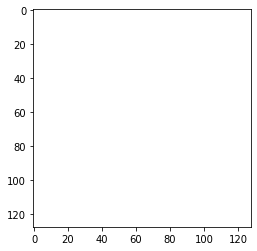

In [12]:
print(temp2[1])

#temp = np.repeat(temp,60).reshape(128,128,60)
print(temp2.shape)
#temp = np.tile((temp),60).reshape(128,128,60)
plt.imshow(temp2[0])

In [44]:
instructions = """
At each trial you see a series of textured images, report if you 
spot a specific digit by pressing the space bar.

Press the space bar to begin the experiment.

"""

win = visual.Window(winType = 'pyglet', size =(800,800), colorSpace = "rgb")

message = visual.TextStim(win, text= instructions)
message.autoDraw = True  # Automatically draw every frame
win.flip()
core.wait(5.0)
message.text = ''  # Change properties of existing stim
win.flip()
core.wait(0.0)
image = data_one.numpy().reshape(6000,128,128)
image = np.interp(image, (image.min(), image.max()), (-1, +1))

while True:
    for i in range(len(image)):
            background = image[i]
            movie_clip = visual.ImageStim(win, background,colorSpace="rgb", contrast = 1, size = 2, flipVert=True)
            movie_clip.draw()
            win.flip()

KeyboardInterrupt: 